In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [93]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)


In [94]:
# content.train.csv
train=pd.read_csv("/content/Train.csv")
# content.test.csv
test=pd.read_csv("/content/Test.csv")

train.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5


In [95]:
test.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...


In [96]:
#combine
combined=pd.concat([train,test],ignore_index=True)
train.shape,test.shape,combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [97]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

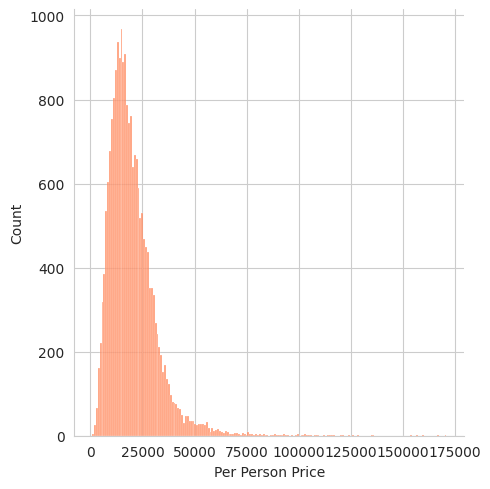

In [98]:
sns.displot(combined["Per Person Price"],color="coral")
plt.show()

In [99]:
len(combined['Places Covered'][0].split('|'))

4

In [100]:
places=[]
for i in combined['Places Covered']:
  places.append(len(i.split('|')))

In [101]:
combined['Places Covered']=pd.Series(places)

In [102]:
sights=[]
for i in combined['Sightseeing Places Covered']:
  sights.append(len(i.split('|')))

In [103]:
combined['Count_SS']=pd.Series(sights)

In [104]:
flights=[]
for i in combined['Airline']:
  flights.append(len(i.split('|')))

In [105]:
combined['Count_flights']=pd.Series(flights)

In [106]:
combined["Travel Date"]=pd.to_datetime(combined["Travel Date"])

In [107]:
combined["Date"]=combined["Travel Date"].dt.day
combined["Month"]=combined["Travel Date"].dt.month
combined["Year"]=combined["Travel Date"].dt.year

In [108]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     30000 non-null  object        
 1   Package Name                30000 non-null  object        
 2   Package Type                30000 non-null  object        
 3   Destination                 30000 non-null  object        
 4   Itinerary                   30000 non-null  object        
 5   Places Covered              30000 non-null  int64         
 6   Travel Date                 30000 non-null  datetime64[ns]
 7   Hotel Details               30000 non-null  object        
 8   Start City                  30000 non-null  object        
 9   Airline                     30000 non-null  object        
 10  Flight Stops                30000 non-null  int64         
 11  Meals                       30000 non-null  int64     

In [109]:
combined.loc[(combined.Airline=="Not Available") & (combined["Flight Stops"]==0),"Meals"].describe()

count    3070.000000
mean        4.583062
std         0.493133
min         4.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Meals, dtype: float64

In [110]:
max_month=combined.groupby("Month")["Per Person Price"].max()

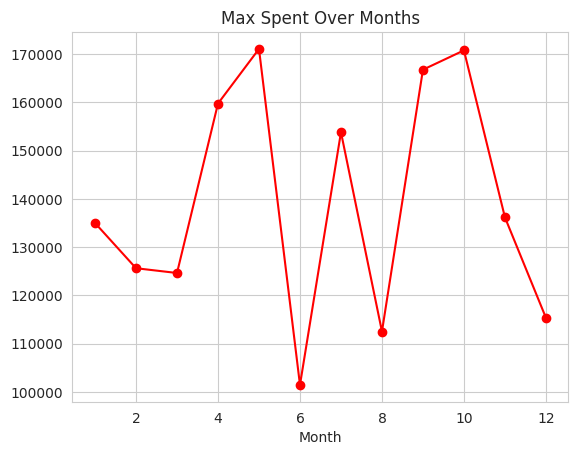

In [111]:
max_month.plot(kind="line",marker="o", color= "red")
plt.title("Max Spent Over Months")
plt.show() # [4,5,7,9,10]

In [112]:
peak = [ 4,5,7,9,10]
def peaks(x):
  if x in peak:
    return("Peak_Month")
  else:
    return("Lean_Month")

In [113]:
combined["Peak_Months"]=combined["Month"].apply(peaks)

In [114]:
combined["Peak_Days"]=combined["Date"].apply(peaks)

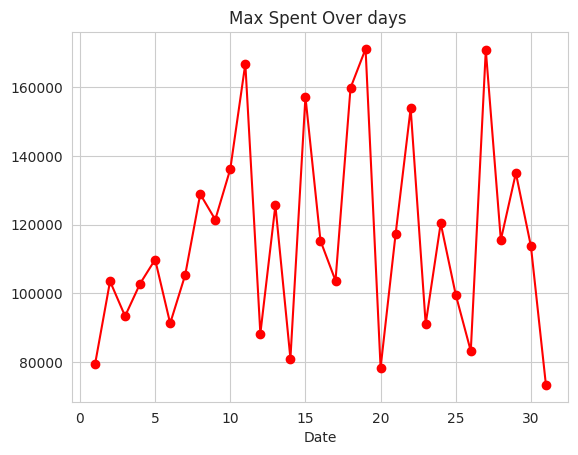

In [115]:
max_days=combined.groupby("Date")["Per Person Price"].max()
max_days.plot(kind="line",marker="o", color= "red")
plt.title("Max Spent Over days ")
plt.show() #[2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]

In [116]:
peak_days = [2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]
combined["Peak_Days"]=combined.Date.apply(lambda x:"Peak_Days" if x in peak_days else "Lean_Days")

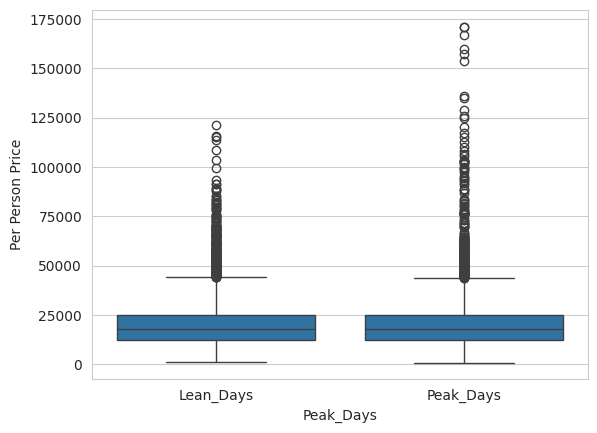

In [117]:
sns.boxplot(x="Peak_Days", y= "Per Person Price",data= combined)
plt.show()

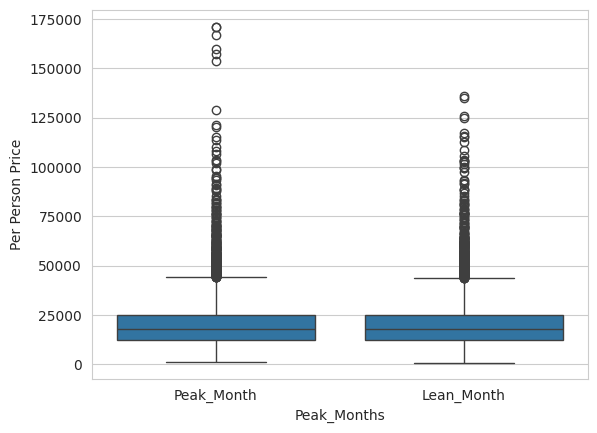

In [118]:
sns.boxplot(x="Peak_Months", y= "Per Person Price",data= combined)
plt.show()

In [119]:
combined.groupby("Peak_Days")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Peak_Days,,,,,,,,
Lean_Days,10008.0,20045.651978,11229.809122,1198.0,12474.75,17899.75,25144.25,121460.0
Peak_Days,10992.0,20071.784298,12008.527526,791.0,12447.00,17653.00,25023.50,171062.5


In [120]:
combined["Itinerary"][0].split(".")

['1N New Delhi ', ' 2N Shimla ', ' 2N Manali ', ' 1N Chandigarh']

In [121]:
combined['Hotel Details'][3]  # \d\.\d

'Elixir Hills Suites Resort & Spa-MMT Holidays Special:4.6|The Zuri Kumarakom, Kerala Resort & Spa:4.6|Marari Beach - CGH Earth:4.3|Estuary Sarovar Portico:'

In [122]:
import re
locs="1N New Delhi ', ' 2N Shimla ', ' 2N Manali ', ' 1N Chandigarh"
np.sum(pd.to_numeric(re.findall("\d",locs)))

6

In [123]:
combined["Duration"]=combined["Itinerary"].apply(lambda x:np.sum(pd.to_numeric(re.findall("\d",x))))

In [124]:
text='Elixir Hills Suites Resort & Spa-MMT Holidays Special:4.6|The Zuri Kumarakom, Kerala Resort & Spa:4.6|Marari Beach - CGH Earth:4.3|Estuary Sarovar Portico:'
np.mean(pd.to_numeric(re.findall('\d\.\d',text)))

4.5

In [125]:
combined["Ratings"]=combined["Hotel Details"].apply(lambda x:np.mean(pd.to_numeric(re.findall('\d\.\d',x))))

In [127]:
#missing value in ratings....
combined.Ratings.fillna(combined.Ratings.median(),inplace=True)

In [128]:
newdata= combined.drop(["Uniq Id","Destination","Itinerary","Places Covered","Travel Date","Hotel Details","Airline","Sightseeing Places Covered","Cancellation Rules","Date","Month"],axis=1)

In [129]:
newdata.head(5)

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_SS,Count_flights,Year,Peak_Months,Peak_Days,Duration,Ratings
0,Best of Shimla and Manali Holiday from Delhi,Standard,Mumbai,2,3,11509.0,1,1,2021,Peak_Month,Lean_Days,6,4.100000
1,Kashmir Valley vacation,Premium,New Delhi,0,5,22485.5,7,2,2021,Lean_Month,Peak_Days,4,4.433333
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,New Delhi,0,4,12421.5,8,1,2021,Peak_Month,Lean_Days,3,4.400000
3,Colorful Kerala ( Romantic Getaway ),Premium,New Delhi,0,5,35967.0,9,1,2021,Lean_Month,Peak_Days,6,4.500000
4,A Week In Bangkok & Pattaya,Premium,New Delhi,0,5,25584.0,2,2,2021,Lean_Month,Lean_Days,7,4.350000


In [130]:
newdata["Package Type"].unique()

array(['Standard', 'Premium', 'Luxury', 'Deluxe', 'Budget'], dtype=object)

In [131]:
newdata.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [132]:
package ={"Budget":1,"Deluxe":5,"Luxury":2,"Premium":4,"Standard":3}
newdata["Package Type"]=newdata["Package Type"].map(package)

In [136]:
newdata["PkgType_Duration_Count"]=newdata.groupby("Package Type")["Duration"].\
transform("count")
newdata["PkgType_Duration_Mean"]=newdata.groupby("Package Type")["Duration"].\
transform("mean")
newdata["PkgType_Duration_Std"]=newdata.groupby("Package Type")["Duration"].\
transform("std")

newdata["PkgType_Duration_Count"]=newdata.groupby("Package Name")["Duration"].\
transform("count")

In [135]:
newdata.groupby("Package Type")["Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
1,682.0,3.478006,1.272186,1.0,3.0,3.0,4.0,7.0
2,4688.0,4.663183,1.792593,1.0,3.0,5.0,6.0,12.0
3,8171.0,4.759148,1.806489,1.0,3.0,5.0,6.0,14.0
4,7960.0,4.765829,1.821384,1.0,3.0,5.0,6.0,14.0
5,8499.0,4.777974,1.749896,1.0,3.0,5.0,6.0,12.0


In [137]:
newdata.groupby("Package Name")["Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Name,,,,,,,,
02 Night Singapore and 02 Night Genting Dream Cruise,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
2 Nights Dubai and 2 Nights Sharjah Holiday,16.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
2 Nights Moscow & 2 Nights Saint Petersburg,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
2 Nights each in Jodhpur & Jaisalmer,14.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
2 Nights in Munnar with Thekkady and Cochin,15.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...
Young and Free - Party Trip to Goa from Mumbai (By Bus),3.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Young and Free - Party Trip to Goa from Pune (By Bus),5.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Young and Free - Udaipur Weekend from Ahmedabad (By Bus),2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [138]:
newdata.head()

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_SS,Count_flights,Year,Peak_Months,Peak_Days,Duration,Ratings,PkgType_Duration_Count,PkgType_Duration_Mean,PkgType_Duration_Std
0,Best of Shimla and Manali Holiday from Delhi,3,Mumbai,2,3,11509.0,1,1,2021,Peak_Month,Lean_Days,6,4.100000,22,4.759148,1.806489
1,Kashmir Valley vacation,4,New Delhi,0,5,22485.5,7,2,2021,Lean_Month,Peak_Days,4,4.433333,11,4.765829,1.821384
2,Might of Mewar- Udaipur and Chittorgarh,2,New Delhi,0,4,12421.5,8,1,2021,Peak_Month,Lean_Days,3,4.400000,29,4.663183,1.792593
3,Colorful Kerala ( Romantic Getaway ),4,New Delhi,0,5,35967.0,9,1,2021,Lean_Month,Peak_Days,6,4.500000,23,4.765829,1.821384
4,A Week In Bangkok & Pattaya,4,New Delhi,0,5,25584.0,2,2,2021,Lean_Month,Lean_Days,7,4.350000,20,4.765829,1.821384


In [139]:
newdata.groupby("Start City")["Package Name"].count()

Start City
Mumbai       10336
New Delhi    19664
Name: Package Name, dtype: int64

In [140]:
newdata.columns

Index(['Package Name', 'Package Type', 'Start City', 'Flight Stops', 'Meals',
       'Per Person Price', 'Count_SS', 'Count_flights', 'Year', 'Peak_Months',
       'Peak_Days', 'Duration', 'Ratings', 'PkgType_Duration_Count',
       'PkgType_Duration_Mean', 'PkgType_Duration_Std'],
      dtype='object')

In [141]:
newdata.drop(['Package Name', 'Package Type', 'Start City'],axis=1,inplace=True)

In [142]:
newdata["Year"]=newdata.Year.astype("object")

In [143]:
#categorical encoding
dummydata= pd.get_dummies(newdata,drop_first=True)
# split the data in train and test
newtrain = dummydata.loc[0:train.shape[0]-1,:]
newtest=dummydata.loc[train.shape[0]:,:]
train.shape,test.shape,newtrain.shape,newtest.shape
#build model

((21000, 15), (9000, 14), (21000, 13), (9000, 13))

In [144]:
newtest.drop("Per Person Price",axis=1,inplace=True)

In [146]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flight Stops            30000 non-null  int64  
 1   Meals                   30000 non-null  int64  
 2   Per Person Price        21000 non-null  float64
 3   Count_SS                30000 non-null  int64  
 4   Count_flights           30000 non-null  int64  
 5   Duration                30000 non-null  int64  
 6   Ratings                 30000 non-null  float64
 7   PkgType_Duration_Count  30000 non-null  int64  
 8   PkgType_Duration_Mean   30000 non-null  float64
 9   PkgType_Duration_Std    30000 non-null  float64
 10  Year_2022               30000 non-null  bool   
 11  Peak_Months_Peak_Month  30000 non-null  bool   
 12  Peak_Days_Peak_Days     30000 non-null  bool   
dtypes: bool(3), float64(4), int64(6)
memory usage: 2.4 MB


In [148]:
from sklearn.ensemble import GradientBoostingRegressor
X=newtrain.drop("Per Person Price",axis=1)
y= newtrain["Per Person Price"]
gbm= GradientBoostingRegressor()
pred_gbm=gbm.fit(X,y).predict(newtest)

In [149]:
submission=pd.DataFrame({'Per Person Price': pred_gbm})
submission.to_csv("Workation_Trip.csv",index=False)